# Úkol č. 1 - vizualizace dat a web scraping (do 20. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.volby.cz týkající se voleb do zastupitelstva Vámi vybraného (většího) města, uložit data o závěrečných pracích v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Vyberte si větší město, které má zastupitelstvo druhu 3 (Zastupitelstvo statutárního města) a strojově stáhněte informace o stranách a kandidátkách z následujících let:
 * [2002](https://www.volby.cz/pls/kv2002/kv12?xjazyk=CZ&xid=0), [2006](https://www.volby.cz/pls/kv2006/kv12?xjazyk=CZ&xid=0), [2010](https://www.volby.cz/pls/kv2010/kv12?xjazyk=CZ&xid=0), [2014](https://www.volby.cz/pls/kv2014/kv12?xjazyk=CZ&xid=0) a [2018](https://www.volby.cz/pls/kv2018/kv12?xjazyk=CZ&xid=0).
 

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data pro vybrané město a uložte je všechny do (asi dvou) přehledných tabulek ve formátu _csv_.
  * Data musí obsahovat _alespoň_ toto:
    * Vývoj výsledků (v procentech i počtu hlasů) pro jednotlivé strany v jednotlivých letech.
    * Seznam všech kandidátů všech stran v jednotlivých letech, u kandidáta by mělo být zaznamenáno: jméno, věk v době voleb, navrhující strana, politická příslušnost, volební zisk (procento i počet hlasů), pořadí na kandidátce, pořadí zvolení, jestli získal mandát (tyto informace získáte souhrnně ve _jmenných seznamech_).
  * V druhé části Vašeho Jupyter notebooku pracujte s těmito tabulkami načtenými z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulky ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).
    * Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
    * Časový vývoj volební účasti a volebních výsledků jednotlivých stran.
    * Časový vývoj podílu kandidujících s titulem a bez titulu.

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.
  * (až +4 body) Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.
  * (až +2 body) Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [1]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
years = ['2006', '2010', '2014', '2018'] #pro pohodlnost parsingu a prace s jednotlive roky udelam pole vsech roku
yearsa = ['2002','2006', '2010', '2014', '2018']
url = 'https://www.volby.cz/pls/kv2002/kv1211?xjazyk=CZ&xid=0&xv=1&xdz=3&xnumnuts=3203'
musor = pd.read_html(url,flavor='html5lib') #udelame list neosetrenych dat pro parsing
musor[1].columns = musor[1].columns.droplevel()
musor[1].iloc[:,1] =  musor[1].iloc[:,1].astype(str).str.replace("\xa0", "").astype(int)
musor[1] = musor[1].rename(columns={"Volební strana": "Jednotlive strany","v %":"Pocet hlasu v %", "abs.": "Pocet hlasu lidi"})
musor[1] = musor[1].iloc[:,[0,1,2]]
### mame hotovou tabulkru pro rok 2002 ###
i=0
v=4
k=1
while i != 4:
    url = 'https://www.volby.cz/pls/kv'
    url += years[i] #jednoduchy parsing
    url += '/kv1111?xjazyk=CZ&xid=0&xdz=3&xnumnuts=3203&xobec=554791&xstat=0&xvyber=0'
    musor += pd.read_html(url,flavor='html5lib')
    if v== 4 or v == 6 or v == 8 or v == 10:
        musor[v].columns = musor[v].columns.droplevel()
        musor[v] = musor[v].rename(columns={"název": "Jednotlive strany", "v %":"Pocet hlasu v %", "abs.": "Pocet hlasu lidi"}) 
        musor[v].iloc[:, 2] = musor[v].iloc[:, 2].astype(str).str.replace("\xa0", "").astype(int)
        musor[v].iloc[:, 3] = musor[v].iloc[:, 3].astype(float)*0.01
        musor[v] = musor[v].iloc[:,[1,2,3]]
    i+=1
    k+=1
    v+=2
ref = [musor[1], musor[4], musor[6], musor[8], musor[10]]
reff = pd.concat(ref, keys = yearsa)
reff.to_csv(r'jedntstrtmp.csv')
jfinal=pd.read_csv('jedntstrtmp.csv')
del jfinal['Unnamed: 1']
jfinal = jfinal.rename(columns = {'Unnamed: 0': "Rok"})
jfinal.to_csv(r'jednstr.csv', index = 0)
display(pd.read_csv('jednstr.csv'))
jfinal = pd.read_csv('jednstr.csv')
os.remove("jedntstrtmp.csv")

,Rok,Jednotlive strany,Pocet hlasu lidi,Pocet hlasu v %
0,2002,Křesťanská a demokratická unie - Československ...,145680,7.43
1,2002,Strana zelených,71830,3.66
2,2002,Česká strana sociálně demokratická,403889,20.59
3,2002,Občanská demokratická aliance,26005,1.33
4,2002,Strana za životní jistoty,8820,0.45
5,2002,Komunistická strana Čech a Moravy,260123,13.26
6,2002,Občanská demokratická strana,743089,37.89
7,2002,Pravá volba pro Plzeň,183245,9.34
8,2002,"Koalice US-DEU, SNK",118713,6.05
9,2006,Plzeňská aliance,168750,7.58


In [2]:
url = 'https://www.volby.cz/pls/kv2002/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=3203&xobec=554791&xstrana=0'
jnk = pd.read_html(url,flavor='html5lib')
del jnk[0]['Kandidátnílistina']
i = 0
while i != 4:
    url = 'https://www.volby.cz/pls/kv'
    url += years[i]
    url += '/kv21111?xjazyk=CZ&xid=0&xv=11&xdz=3&xnumnuts=3203&xobec=554791&xstrana=0'
    jnk += pd.read_html(url,flavor='html5lib')
    del jnk[i+1]['Kandidátní listina']
    i+=1
#display(jnk[0].iloc[:,[1,2,3,4,5,6,7,0,8,9]])
k = jnk[0].iloc[:,[1,2,3,4,5,6,7,0,8,9]]
k.columns = k.columns.droplevel()
k = k.replace({pd.np.nan: ' '})

In [3]:
lol = [k, jnk[1].iloc[:,[1,2,3,4,5,6,7,0,8,]], jnk[2].iloc[:,[1,2,3,4,5,6,7,0,8,]], jnk[3].iloc[:,[1,2,3,4,5,6,7,0,8,]],jnk[4].iloc[:,[1,2,3,4,5,6,7,0,8,]]]
z = 0
while z != 5 :
    if z == 0:
        lol[z] = lol[z].rename(columns = {'abs.' : "Pocet hlasu lidi", "Tituly":'Titul', 'v %': "Pocet hlasu v %", "Poř.číslo": "Pořadí kand.", "Pořadí": "Pořadí zvoleni"})
    else:
        lol[z].columns = lol[z].columns.droplevel()
        n = lol[z]['příjmení, jméno, tituly'].str.split(' ').str[:2] ##protoze od 2006 do 2018 titul je ve slupce se jmenem-
        n = n.apply(' '.join) # - vezmeme jmeno a prijmeni a spojime " "
        kc = lol[z]['příjmení, jméno, tituly'].str.split(' ').str[2:] # zustatek je nasimi tituly
        kc = kc.apply(' '.join) # take spjime dohromady
        kc = kc.replace('', ' ', regex=True) #lide bez tituly nahradime " "
        kc = kc.astype(str)
        #display(kc)
        lol[z].iloc[:,[0]] = n
        lol[z].insert(1, 'Titul', kc)
        lol[z] = lol[z].rename(columns={"příjmení, jméno, tituly": "Příjmení, jméno","Politickápříslušnost" : "Polit.přísl.", "věk": "Věk", "Navrhujícístrana" :"Navrh.strana" ,"Politickápříslušnost":"Polit.přísl.","abs." :"Pocet hlasu lidi", "v %": "Pocet hlasu v %", "Pořadízvolení/náhradníka" :"Pořadí kand.", "poř.číslo" : "Pořadí zvoleni"})
        kk = lol[z]['Pocet hlasu v %'].astype(float)
        kk*=0.01
        lol[z] = lol[z].drop(columns = ['Pocet hlasu v %'])
        lol[z].insert(6, 'Pocet hlasu v %', kk)
    z+=1
y = pd.concat(lol, keys = yearsa)
y.iloc[:,5] = y.iloc[:,5].astype(str).str.replace("\xa0", "").astype(int)
y.iloc[:,7]=y.iloc[:,7].astype(str).replace("-","0").astype(int)
y.iloc[:,8]=y.iloc[:,8].astype(str).replace(" ","0").astype(float).astype(int)
y.to_csv(r'kandstmp.csv')
final=pd.read_csv('kandstmp.csv')
del final['Unnamed: 1']
final = final.rename(columns = {'Unnamed: 0': "Rok"})
final.to_csv(r'kands.csv', index = 0)
display(pd.read_csv('kands.csv'))
os.remove("kandstmp.csv")

,Rok,"Příjmení, jméno",Titul,Věk,Navrh.strana,Polit.přísl.,Pocet hlasu lidi,Pocet hlasu v %,Pořadí kand.,Pořadí zvoleni,Mandát
0,2002,Adamec Pavel,MUDr.,35,US-DEU,US-DEU,2474,2.08,29,26,
1,2002,Aloy Zdeněk,Ing.,70,ČSSD,ČSSD,7283,1.80,45,35,
2,2002,Anderle Jan,Ing.,46,PVP,PVP,5358,2.92,3,3,*
3,2002,Andrlík Roman,,35,ČSSD,ČSSD,7665,1.89,43,33,
4,2002,Anton Jiří,,27,SZ,BEZPP,1343,1.86,16,0,
5,2002,Arnošt Patrik,,30,US-DEU,US-DEU,2476,2.08,13,10,
6,2002,Aschenbrenner Lumír,Ing.,42,ODS,ODS,17550,2.36,17,3,*
7,2002,Aust Jan,,71,KSČM,KSČM,5068,1.94,47,39,
8,2002,Babnič Jan,,48,ČSSD,ČSSD,8220,2.03,34,24,
9,2002,Ballýová Hana,,61,KSČM,KSČM,5405,2.07,40,32,


In [4]:
import matplotlib.pyplot as plt # takto se matplotlib standardně importuje
import matplotlib
# bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 
matplotlib.style.use('ggplot')
final = pd.read_csv('kands.csv')
jfinal = pd.read_csv('jednstr.csv')

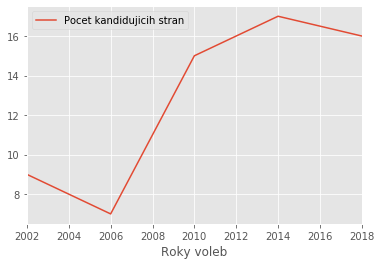

In [72]:
import array
poc = [jfinal['Rok'][jfinal['Rok'] == 2002].count(), jfinal['Rok'][jfinal['Rok'] == 2006].count(), jfinal['Rok'][jfinal['Rok'] == 2010].count(), jfinal['Rok'][jfinal['Rok'] == 2014].count(), jfinal['Rok'][jfinal['Rok'] == 2018].count()]
tab = {'Roky voleb': yearsa, 'Strany': poc}
t = pd.DataFrame(data = tab)
t['Roky voleb'] = t['Roky voleb'].astype(int)
t.plot(x = 'Roky voleb', y= 'Strany', label = 'Pocet kandidujicih stran')

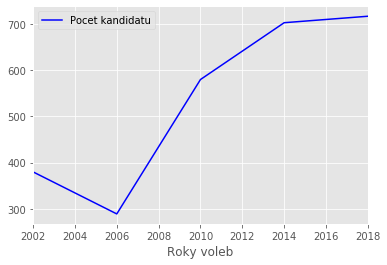

In [6]:
poc = [final['Rok'][final['Rok'] == 2002].count(), final['Rok'][final['Rok'] == 2006].count(), final['Rok'][final['Rok'] == 2010].count(), final['Rok'][final['Rok'] == 2014].count(), final['Rok'][final['Rok'] == 2018].count()]
tab = {'Roky voleb': yearsa, 'Pocet kandidatu': poc}
t = pd.DataFrame(data = tab)
t['Roky voleb'] = t['Roky voleb'].astype(int)
t.plot(x = 'Roky voleb', y = 'Pocet kandidatu', label = 'Pocet kandidatu', color = 'Blue')

,Strany,Cislo na grafu
0,Křesťanská a demokratická unie - Československ...,1
1,Strana zelených,2
2,Česká strana sociálně demokratická,3
3,Občanská demokratická aliance,4
4,Strana za životní jistoty,5
5,Komunistická strana Čech a Moravy,6
6,Občanská demokratická strana,7
7,Pravá volba pro Plzeň,8
8,"Koalice US-DEU, SNK",9
9,Plzeňská aliance,10


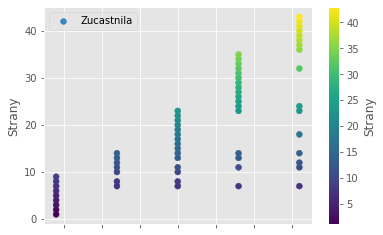

In [35]:
fuu = pd.read_csv('jednstr.csv')
yearsa = [2002,2006, 2010, 2014, 2018]
stri = fuu['Jednotlive strany'].unique()
mmm = []
ucas = []
for i in yearsa:
    tab1 = {'Roky voleb': i, 'Strany': stri}
    t = pd.DataFrame(data = tab1)
    mmm.append(t)
m = pd.concat(mmm, ignore_index = True)
for i in yearsa:
    fone = fuu[fuu['Rok'] == i]
    for j in stri:
        if (fone[fone['Jednotlive strany'] == j].empty):
            ucas.append(0)
        else: ucas.append(1)
m.insert(2,'Zucastnila', ucas)
kk=1
f =[]
for i in stri:
    m.Strany = m.Strany.replace(i, kk)
    f.append(kk)
    kk+=1
#display(m)
zuc = m[m.Zucastnila == 1]
d = {'Strany': stri, 'Cislo na grafu': f}
t = pd.DataFrame(data = d)
display(t)
zuc.plot.scatter(x='Roky voleb', y='Strany', label='Zucastnila', s = 35, c='Strany', colormap = 'viridis')

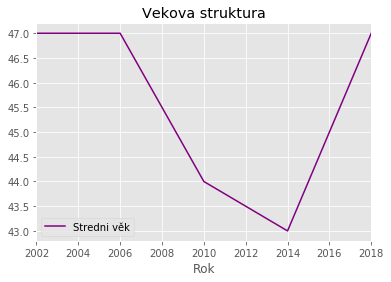

In [8]:
#pro vekovou strukturu budu pouzivat medianu nikoli algebraicky stred, myslim ze bude to presnejsi
old = []
for i in yearsa:
    fone = final[final.Rok == i]
    a = fone.loc[:,"Věk"].median()
    old.append(a)
d = {'Rok' : yearsa, 'Stredni věk' : old}
tab = pd.DataFrame(data = d)
tab.plot(x ='Rok', y = 'Stredni věk', label = 'Stredni věk', color = 'Purple', title = "Vekova struktura")

,Strany,Cislo na grafech
0,US-DEU,1
1,ČSSD,2
2,PVP,3
3,SZ,4
4,ODS,5
5,KSČM,6
6,KDU-ČSL,7
7,ODA,8
8,SŽJ,9
9,SNK ED,10


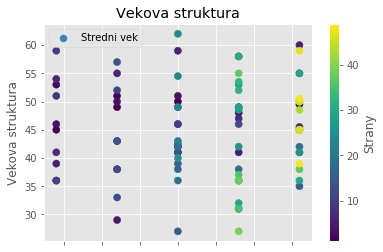

In [75]:
yearsa = [2002,2006, 2010, 2014, 2018]
stri = final['Navrh.strana'].unique()
mmm = []
poc = []
for i in yearsa:
    tab1 = {'Roky voleb': i, 'Strany': stri}
    t = pd.DataFrame(data = tab1)
    mmm.append(t)
m = pd.concat(mmm, ignore_index = True)
for i in yearsa:
    fone = final[final['Rok'] == i]
    for j in stri:
        poc.append(fone[fone['Navrh.strana'] == j]['Věk'].median())
m.insert(2,'Vekova struktura', poc)                                                     
kk=1
f =[]
for i in stri:
    m.Strany = m.Strany.replace(i, kk)
    f.append(kk)
    kk+=1
#display(m)
gfs = []
d = {'Strany': stri, 'Cislo na grafech': f}
t = pd.DataFrame(data = d)
display(t)
m.plot.scatter(x = 'Roky voleb', y = 'Vekova struktura', label = 'Stredni vek', title = 'Vekova struktura', c='Strany', colormap='viridis', s = 50)
#m.plot(x = 'Roky voleb', y = 'Vekova struktura', label = 'Stredni vek', title = 'Vekova struktura')
#z grafu da se videt ze vekova struktura celych voleb koreluje z vekovou strukturou jednotlivych stran

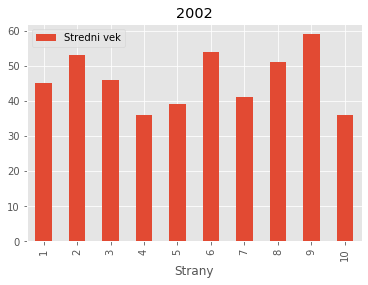

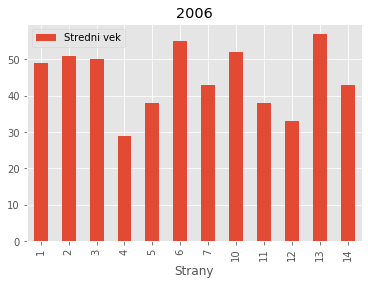

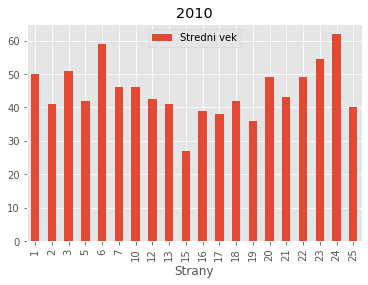

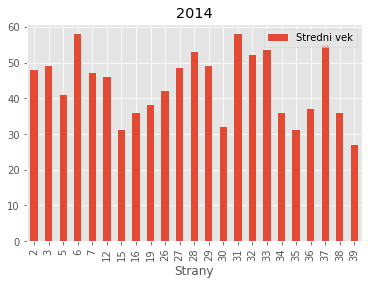

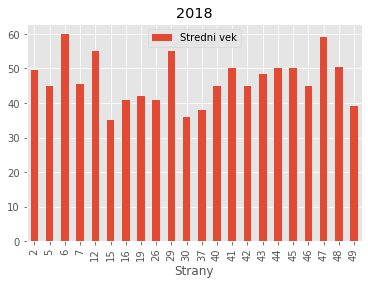

In [78]:
m.dropna()
for i in yearsa:
    f = m[m['Roky voleb'] == i].dropna()
    f.plot.bar(x = 'Strany', y = 'Vekova struktura',label = 'Stredni vek', title =  i, stacked = True)

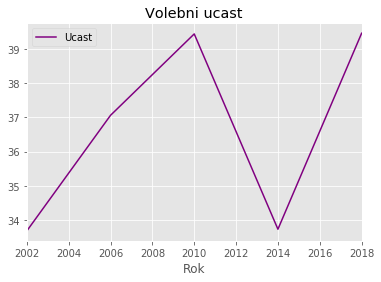

In [11]:
vuc = [musor[0].iloc[:,7], musor[3].iloc[:,7]*0.01, musor[5].iloc[:,7]*0.01, musor[7].iloc[:,7]*0.01, musor[9].iloc[:,7]*0.01]
v = pd.concat(vuc)
d = {'Rok' : yearsa, 'Ucast' : v}
t = pd.DataFrame(data = d)
t.plot(x= 'Rok', y = 'Ucast', label = 'Ucast', color = 'Purple', title = 'Volebni ucast')

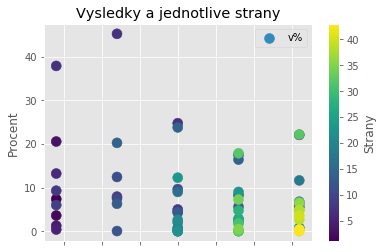

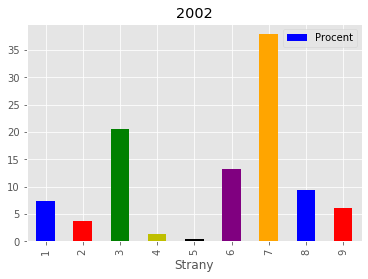

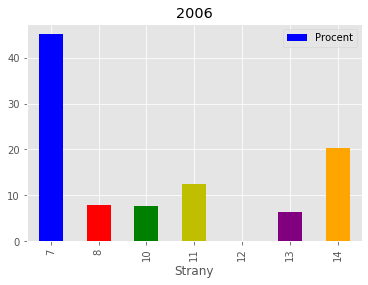

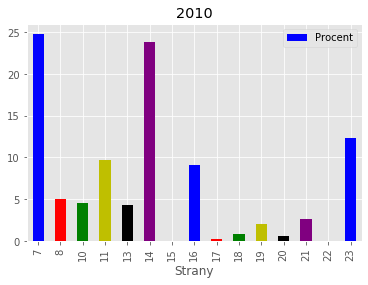

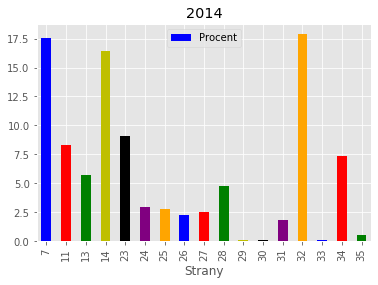

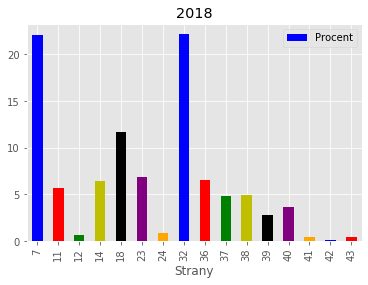

In [87]:
from itertools import cycle, islice
stri = jfinal['Jednotlive strany'].unique()
mmm = []
ucas = []
for i in yearsa:
    tab1 = {'Roky voleb': i, 'Strany': stri}
    t = pd.DataFrame(data = tab1)
    mmm.append(t)
m = pd.concat(mmm, ignore_index = True)
hl = []
for i in yearsa:
    fone = jfinal[jfinal['Rok'] == i]
    for j in stri:
        if(fone[fone['Jednotlive strany'] == j]['Pocet hlasu v %'].empty):
            hl.append(0)
        else:
            k = fone[fone['Jednotlive strany'] == j].iloc[:,[3]].values
            hl.append(k[0][0])
fone = jfinal[jfinal['Rok'] == 2002]
m.insert(2, 'Procent', hl)
m = m[m.Procent != 0 ]
kk=1
for i in stri:
    m.Strany = m.Strany.replace(i, kk)
    kk+=1
m.plot.scatter(x = 'Roky voleb', y = 'Procent', label = 'v%', c = 'Strany', colormap = 'viridis', s= 100, title = 'Vysledky a jednotlive strany')
for i in yearsa:
    fone = m[m['Roky voleb'] == i]
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k', 'purple', 'orange']), None, len(fone)))
    fone.plot.bar(x = 'Strany', y = 'Procent', title = i, color = my_colors )

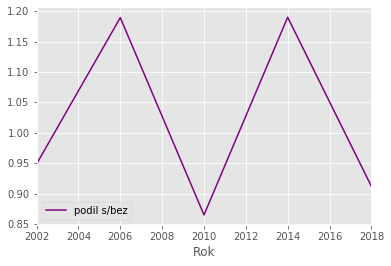

In [29]:
res = []
for i in yearsa:
    fone = final[final['Rok'] == i]
    kek = len(fone[fone['Titul'] != ' '])
    lul = len(fone[fone['Titul'] == ' '])
    res.append(kek/lul)
dat = {"Rok" : yearsa, "Podil kandidatu s titulem a bez" : res}
p = pd.DataFrame(data = dat)
p.plot(x = 'Rok', y='Podil kandidatu s titulem a bez', label = 'podil s/bez', color = 'Purple' )